# Starting notebook SEN124A Project - Mississippi

You can use this notebook as a start for your network analysis with python/networkx

In [167]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import math

In [168]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('mississippi.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b
0,1,Washington,Oregon
1,1,Washington,California
2,1,California,Oregon
3,1,California,Nevada
4,1,California,Arizona
5,1,California,Texas
6,1,California,Indiana
7,1,Arizona,Texas
8,1,Texas,Louisiana
9,1,Texas,Florida


In [169]:
mississippi_network

,weight,0,b
0,1,Washington,Oregon
1,1,Washington,California
2,1,California,Oregon
3,1,California,Nevada
4,1,California,Arizona
5,1,California,Texas
6,1,California,Indiana
7,1,Arizona,Texas
8,1,Texas,Louisiana
9,1,Texas,Florida


In [170]:
# Read in the excel file 'mississippi.xlsx' as a dataframe
mississippi_network = pd.read_excel('distance_state.xlsx')
# Show contents of the dataframe
mississippi_network

,weight,0,b,Distance
0,1,Washington,Oregon,160
1,1,Washington,California,693
2,1,California,Oregon,536
3,1,California,Nevada,130
4,1,California,Arizona,755
...,...,...,...,...
67,1,Wisconsin,Illinois,264
68,1,Illinois,Indiana,208
69,1,Michigan,Illinois,391
70,1,Ohio,Michigan,254


In [171]:
# Make a graph from the dataframe
Mississippi_Graph= nx.from_pandas_edgelist(mississippi_network, 0, 'b', edge_attr='Distance', create_using=nx.DiGraph() )


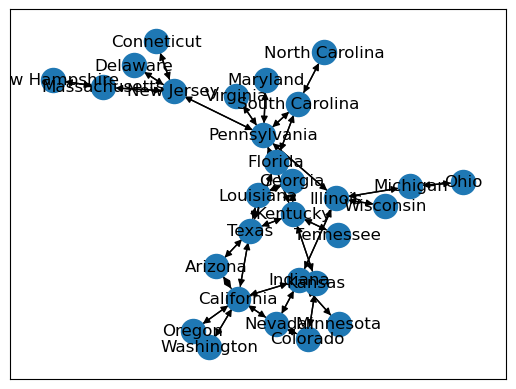

In [172]:
# Plot the graph
nx.draw_networkx(Mississippi_Graph, with_labels = True)

In [173]:
nx.shortest_path_length(Mississippi_Graph,'Michigan','Ohio','Distance')

254

In [174]:
#create a new node attribute "warehouse size"
whs = []
nx.set_node_attributes(Mississippi_Graph, whs, "warehouse size")

#Set the data per new node for the attribute "warehouse size"
Mississippi_Graph.nodes["Arizona"]["warehouse size"] = 3210500
Mississippi_Graph.nodes["California"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Colorado"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Conneticut"]["warehouse size"] = 14123800
Mississippi_Graph.nodes["Delaware"]["warehouse size"] = 1000200
Mississippi_Graph.nodes["Florida"]["warehouse size"] = 4890000
Mississippi_Graph.nodes["Georgia"]["warehouse size"] = 1385000
Mississippi_Graph.nodes["Indiana"]["warehouse size"] = 5450000
Mississippi_Graph.nodes["Illinois"]["warehouse size"] = 6012000
Mississippi_Graph.nodes["Kansas"]["warehouse size"] = 2120000
Mississippi_Graph.nodes["Kentucky"]["warehouse size"] = 5145000
Mississippi_Graph.nodes["Maryland"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Massachusetts"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Michigan"]["warehouse size"] = 1000000
Mississippi_Graph.nodes["Minnesota"]["warehouse size"] = 820000
Mississippi_Graph.nodes["Nevada"]["warehouse size"] = 2150000
Mississippi_Graph.nodes["New Hampshire"]["warehouse size"] = 63800
Mississippi_Graph.nodes["New Jersey"]["warehouse size"] = 2260000
Mississippi_Graph.nodes["North Carolina"]["warehouse size"] = 397800
Mississippi_Graph.nodes["Ohio"]["warehouse size"] = 1855000
Mississippi_Graph.nodes["Oregon"]["warehouse size"] = 855000
Mississippi_Graph.nodes["Pennsylvania"]["warehouse size"] = 8350000
Mississippi_Graph.nodes["South Carolina"]["warehouse size"] = 2340000
Mississippi_Graph.nodes["Tennessee"]["warehouse size"] = 3680000
Mississippi_Graph.nodes["Texas"]["warehouse size"] = 8834000
Mississippi_Graph.nodes["Virginia"]["warehouse size"] = 2300000
Mississippi_Graph.nodes["Washington"]["warehouse size"] = 2280000
Mississippi_Graph.nodes["Wisconsin"]["warehouse size"] = 1100000
Mississippi_Graph.nodes["Louisiana"]["warehouse size"] = 50000000

More information about Graph operations can be found in the NetworkX documentation:
https://networkx.github.io/documentation/stable/index.html

For example, this is the documentation on calculating the edge betweenness centrality:
https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html#networkx.algorithms.centrality.edge_betweenness_centrality

In [175]:
def entropic_degree(graph, weight):
    out = defaultdict(dict)
    out2 = defaultdict(dict)
    out3 = defaultdict(dict)
    out4 = defaultdict(dict)
    df = pd.DataFrame(columns=['Node'])
    d = {}
    e = {}
    f = {}
    g = {}
    global h
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            distance = graph[i2][i3][weight]
            out[i2][i3] = distance
    for i2 in list(graph):
        key = str(i2)
        d[key] = sum(out[i2].values())
    for i2 in list(graph):
        for i3 in list(graph.neighbors(i2)):
            pij = out[i2][i3] / d[i2]
            log_pij = math.log10(pij)
            pij_multiplied_log_pij = pij * log_pij
            out2[i2][i3] = pij_multiplied_log_pij
    for i2 in list(graph):
        key = str(i2)
        e[key] = sum(out2[i2].values())
    for i2 in list(graph):
        key = str(i2)
        f[key] = 1 - e[key]
    for i2 in list(graph):
        key = str(i2)
        g[key] = d[key] * f[key]
    
    h = pd.DataFrame.from_dict(g, orient='index',)
    h.rename(columns = {0: 'Entropic_Degree'}, inplace = True)
    h.sort_values(by=['Entropic_Degree'], ascending=False, inplace=True)
    return h

In [176]:
entropic_degree(Mississippi_Graph,'Distance')

,Entropic_Degree
California,10101.622042
Texas,8537.698356
Indiana,7466.658887
Kentucky,4717.331700
Nevada,4245.905455
Pennsylvania,3942.749267
Illinois,2494.283836
Arizona,2287.047361
Florida,2109.860532
Colorado,1961.406416


In [177]:
def demand_adjusted_entropic_degree(graph, weight, demand):
    a = entropic_degree(graph, weight)
    j = {}
    l = {}
    for i in list(graph):
        key = str(i)
        j[key] = graph.nodes[i][demand]
    highest = max(j.values())
    for i in list(graph):
        key = str(i)
        j[key] = graph.nodes[i][demand]
        for k in a.index:
            if k == key:
                l[key] = (a['Entropic_Degree'][k] / 2) * (1 + (j[key]/highest))
    m = pd.DataFrame.from_dict(l, orient='index',)
    m.rename(columns = {0: 'Demand_Adjusted_Entropic_Degree'}, inplace = True)
    m.sort_values(by=['Demand_Adjusted_Entropic_Degree'], ascending=False, inplace=True)
    return m
    


In [178]:
def metrics_graph(graph,weight,demand,location):
    c = list(Mississippi_Graph.nodes)
    df = pd.DataFrame(columns=['State','Closeness_centrality'])
    for i in c:
        a = nx.closeness_centrality(Mississippi_Graph,i,weight)
        new_row = {'State': i, 'Closeness_centrality': a}
        df = df.append(new_row, ignore_index=True)
    df.sort_values(by=['Closeness_centrality'], ascending=False)
    df3 = pd.DataFrame(columns=['State','Shortest_path_to_production_facility'])
    b = nx.shortest_path_length(Mississippi_Graph,'Louisiana',weight='Distance')
    for i in b:
        new_row = {'State': i, 'Shortest_path_to_production_facility': b[i]}
        df3 = df3.append(new_row, ignore_index=True)
    df3
    average_shortest_path = sum(b.values()) / len(b)
    df1 = pd.DataFrame(columns=['State','Betweenness_centrality'])
    d = nx.betweenness_centrality(Mississippi_Graph,weight='Distance')
    for i in d:
        new_row = {'State': i, 'Betweenness_centrality': d[i]}
        df1 = df1.append(new_row, ignore_index=True)
    a = demand_adjusted_entropic_degree(graph, weight, demand)
    
    print('Closeness centrality for all nodes:')
    display(df)
    print('Shortest path to production center:')
    display(df3)
    print('Average shortest path to production center:')
    display(average_shortest_path)
    print('Betweenness centrality for all nodes:')
    display(df1)
    print('Demand adjusted entropic degree for all nodes:')
    display(a)
    import warnings
    warnings.filterwarnings("ignore")

In [179]:
metrics_graph(Mississippi_Graph,'Distance','warehouse size','Louisiana')


Closeness centrality for all nodes:


,State,Closeness_centrality
0,Washington,0.000336
1,Oregon,0.000354
2,California,0.000427
3,Nevada,0.000436
4,Arizona,0.000416
5,Texas,0.000538
6,Indiana,0.000619
7,Louisiana,0.000547
8,Florida,0.000652
9,Kentucky,0.000774


Shortest path to production center:


,State,Shortest_path_to_production_facility
0,Louisiana,0
1,Texas,432
2,Georgia,526
3,Florida,787
4,Kentucky,933
5,South Carolina,1142
6,Tennessee,1143
7,North Carolina,1369
8,Arizona,1441
9,Pennsylvania,1495


Average shortest path to production center:


1763.9655172413793

Betweenness centrality for all nodes:


,State,Betweenness_centrality
0,Washington,0.000000
1,Oregon,0.000000
2,California,0.174603
3,Nevada,0.171958
4,Arizona,0.000000
5,Texas,0.082011
6,Indiana,0.124339
7,Louisiana,0.005291
8,Florida,0.063492
9,Kentucky,0.404762


Demand adjusted entropic degree for all nodes:


,Demand_Adjusted_Entropic_Degree
California,6477.543915
Texas,5023.069451
Indiana,4140.262353
Kentucky,2601.372566
Pennsylvania,2300.594197
Nevada,2214.239695
Illinois,1397.098262
Louisiana,1244.380678
Arizona,1216.949336
Florida,1158.102446
